In [1]:
using Flux
using Plots
using ProgressMeter
using LinearAlgebra

include("DenseNTK.jl")

In [29]:
#
#  Create models with NTK intitialization
#
m1_NTK=DenseNTK(1,3,sigmoid)

DenseNTK(Float32[-0.30197406; -1.2219666; 0.6810273;;], Float32[0.0, 0.0, 0.0], NNlib.σ)

In [3]:
m2_NTK=DenseNTK(1 =>3 ,sigmoid)

DenseNTK(Float32[-1.8273023; 3.0744374; -0.0016785379;;], Float32[0.0, 0.0, 0.0], NNlib.σ)

In [4]:
#
#  DenseNTK fits into the Chain function 
#
model1_NTK=Chain(DenseNTK(1 => 3, sigmoid,init=ones),DenseNTK( 3 => 1, init=ones))

Chain(
  DenseNTK([1.0; 1.0; 1.0;;], [0.0, 0.0, 0.0], NNlib.σ),  # 6 parameters
  DenseNTK([1.0 1.0 1.0], [0.0], identity),  # 4 parameters
)                   # Total: 4 arrays, 10 parameters, 384 bytes.

In [5]:
#
#  Model parametes can be extracted as usually
#
ps1_NKT=Flux.params(model1_NTK)

ps1_NKT[1],ps1_NKT[2],ps1_NKT[3],ps1_NKT[4]

([1.0; 1.0; 1.0;;], [0.0, 0.0, 0.0], [1.0 1.0 1.0], [0.0])

In [6]:
#
#  The model takes in Vectors
#
model1_NTK([0.1f0])  # 1 element vector

1-element Vector{Float64}:
 0.9092906262733799

In [7]:
#
#  Testing the activation function
#
ms_NTK=DenseNTK(1 => 3, sigmoid, init=ones) # sigmoid
mt_NTK=DenseNTK(1 => 3, tanh, init=ones)    # tanh
mr_NTK=DenseNTK(1 => 3, relu, init=ones)    # relu
xin=[-1.0f0]  # 1 element vector
ms_NTK(xin),mt_NTK(xin),mr_NTK(xin) 

([0.2689414213699951, 0.2689414213699951, 0.2689414213699951], [-0.761594155955765, -0.761594155955765, -0.761594155955765], [0.0, 0.0, 0.0])

In [30]:
#
#  Testing the normalization
#
xin=rand(Float32,3)
#
m5=Dense(3,1,init=ones)

Dense(3 => 1)       # 4 parameters

In [9]:
Flux.params(m5),m5(xin)  # Print out weight,bias  AND value: m5(xin) 

(Params([[1.0 1.0 1.0], [0.0]]), [0.5780493021011353])

In [10]:
m5_NTK=DenseNTK(3,1,init=ones)

DenseNTK([1.0 1.0 1.0], [0.0], identity)

In [11]:
Flux.params(m5_NTK),m5_NTK(xin)  # 

(Params([[1.0 1.0 1.0], [0.0]]), [0.3337369201729658])

In [12]:
m5(xin)/sqrt(size(m5_NTK.weight)[2])  # Correct!

1-element Vector{Float64}:
 0.33373692017296575

In [15]:
#
#  Check gradients
#
gs=Flux.gradient(() -> model1_NTK([1.0f0])[1],ps1_NKT)

Grads(...)

In [16]:
gs[ps1_NKT[1]], gs[ps1_NKT[2]],gs[ps1_NKT[3]],gs[ps1_NKT[4]]

([0.11351395258286229; 0.11351395258286229; 0.11351395258286229;;], [0.11351395258286229, 0.11351395258286229, 0.11351395258286229], [0.42207686716541853 0.42207686716541853 0.42207686716541853], [1.0])

In [17]:
#
#  Check gradients
#
gs[ps1_NKT[1]]

3×1 Matrix{Float64}:
 0.11351395258286229
 0.11351395258286229
 0.11351395258286229

In [18]:
gs[ps1_NKT[3]]

1×3 Matrix{Float64}:
 0.422077  0.422077  0.422077

In [19]:
#
# Testing the training
#
loss(x,y)=Flux.mse(x,y)


loss (generic function with 1 method)

In [47]:
#
#  Calculating the gradient by hand with 2x2 parameter objects
#


#
#  Trivial data points
#
Nx=21
xa=-1.0
xb=1.0

xVec=collect(range(-1.0,stop=1.0,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec));

data = [(reshape(xVec,1,Nx) , reshape(yVec,1,Nx) )]

#
#  Dense model with one hidden layer
#
Nh=10_000

10000

In [48]:
#
#  Dense model with one hidden layer NTK version
#

modelNTK = Chain(DenseNTK(1 => Nh,sigmoid),DenseNTK(Nh => 1))

Chain(
  DenseNTK(Float32[0.75204; -0.98224837; … ; 0.42262533; 1.4807498;;], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], NNlib.σ),  # 20_000 parameters
  DenseNTK(Float32[-0.91228735 -0.011520412 … 1.7230709 -0.38027528], Float32[0.0], identity),  # 10_001 parameters
)                   # Total: 4 arrays, 30_001 parameters, 117.488 KiB.

In [49]:
xin=1.0
gsmNTK = Flux.gradient(() -> modelNTK([ 1.0])[1],Flux.params(modelNTK))
gsmNTKm = Flux.gradient(() -> modelNTK([-1.0])[1],Flux.params(modelNTK))

Grads(...)

In [50]:
Flux.params(modelNTK)[3]

1×10000 Matrix{Float32}:
 -0.912287  -0.0115204  -0.580311  0.287017  …  -0.466472  1.72307  -0.380275

In [51]:
gsmNTK[Flux.params(modelNTK)[3]] 

1×10000 Matrix{Float64}:
 0.00679623  0.00272446  0.0083878  …  0.00500812  0.00604111  0.00814686

In [52]:
gsmNTKm[Flux.params(modelNTK)[3]] *gsmNTK[Flux.params(modelNTK)[3]]'

1×1 Matrix{Float64}:
 0.20631748497514404

In [53]:
(sigmoid.(Flux.params(modelNTK)[1]*[1.0] .+ Flux.params(modelNTK)[2])/sqrt(Nh))'*(sigmoid.(Flux.params(modelNTK)[1]*[-1.0] .+ Flux.params(modelNTK)[2])/sqrt(Nh))

0.20631748497514404

In [54]:
gsmNTK[Flux.params(modelNTK)[2]][1:4]  # Why are there few significant digits??

4-element Vector{Float32}:
 -0.001986374
 -2.283566f-5
 -0.0007847449
  0.0006912686

In [55]:
(Flux.params(modelNTK)[3][1,1]/sqrt(Nh))*sigmoid(Flux.params(modelNTK)[1][1,1]*xin+Flux.params(modelNTK)[2][1])*(1-sigmoid(Flux.params(modelNTK)[1][1,1]*xin+Flux.params(modelNTK)[2][1]))

-0.001986373983780991

In [56]:
DmNTK=zeros(Float32,3*Nh+1,Nx);
for nx=1:Nx
    gsmNTK = Flux.gradient(() -> modelNTK([xVec[nx]])[1],Flux.params(modelNTK))
    DmNTK[1:Nh,nx]=gsmNTK[Flux.params(modelNTK)[1]][:]
    DmNTK[Nh+1:2*Nh,nx]=gsmNTK[Flux.params(modelNTK)[2]][:]
    DmNTK[2*Nh+1:3*Nh,nx]=gsmNTK[Flux.params(modelNTK)[3]][:]
    DmNTK[3*Nh+1:3*Nh+1,nx]=gsmNTK[Flux.params(modelNTK)[4]][:]
end

In [57]:
Knm=DmNTK[1:3*Nh,:]' * DmNTK[1:3*Nh,:]

21×21 Matrix{Float32}:
 0.379751  0.374181  0.368088  0.361443  …  0.222166  0.214011  0.206317
 0.374181  0.36925   0.363824  0.357875     0.22911   0.22148   0.214283
 0.368088  0.363824  0.359101  0.353889     0.236465  0.229392  0.222719
 0.361443  0.357875  0.353889  0.349453     0.244222  0.237739  0.23162
 0.354228  0.351382  0.348163  0.344539     0.252359  0.246501  0.240966
 0.346437  0.344334  0.341909  0.339129  …  0.26084   0.255642  0.250719
 0.33808   0.336736  0.335125  0.333216     0.269609  0.265105  0.260824
 0.329189  0.328612  0.32783   0.326811     0.278594  0.274815  0.271205
 0.319816  0.320012  0.320065  0.319944     0.2877    0.284679  0.281766
 0.310042  0.311005  0.311892  0.312672     0.296822  0.294586  0.292394
 0.299967  0.301689  0.303399  0.305072  …  0.305844  0.304415  0.302965
 0.289709  0.292173  0.294691  0.297239     0.314651  0.314045  0.313353
 0.279395  0.28258   0.285882  0.28928      0.323137  0.323365  0.323441
 0.269146  0.273028  0.277088

In [59]:
sum(Flux.params(modelNTK)[3].^2)/10000

0.9996642f0

In [270]:
using LinearAlgebra

In [271]:
eigen(Knm).values

21-element Vector{ComplexF32}:
    -1.35797f-7 + 0.0f0im
   -6.633742f-8 - 2.5932787f-8im
   -6.633742f-8 + 2.5932787f-8im
  -5.5005046f-8 + 0.0f0im
    -3.25749f-8 - 7.1831415f-8im
    -3.25749f-8 + 7.1831415f-8im
   2.1736302f-8 - 1.3908611f-8im
   2.1736302f-8 + 1.3908611f-8im
   4.1725617f-8 + 0.0f0im
     7.46362f-8 - 2.784759f-8im
     7.46362f-8 + 2.784759f-8im
   9.9386924f-8 + 0.0f0im
   1.2734331f-7 + 0.0f0im
   1.5853493f-7 + 0.0f0im
   4.1537743f-7 + 0.0f0im
    9.134751f-6 + 0.0f0im
   4.9549915f-5 + 0.0f0im
 0.0016404038f0 + 0.0f0im
    0.0084685f0 + 0.0f0im
     0.712762f0 + 0.0f0im
     6.295699f0 + 0.0f0im

In [272]:
loss(model(reshape(xVec,1,21)),reshape(yVec,1,21))

3.8287167063273593

In [274]:
using ProgressMeter

opt_state = Flux.setup(Descent(0.3), modelNTK)

@showprogress  desc="Computing..." for epoch in 1:1e5#8e4
  Flux.train!(modelNTK, data, opt_state) do m, x, y
    loss(m(x), y)
  end
end

Computing... 100%|███████████████████████████████████████| Time: 0:00:41


In [273]:
loss(modelNTK(reshape(xVec,1,21)),reshape(yVec,1,21))

0.5322715141106388

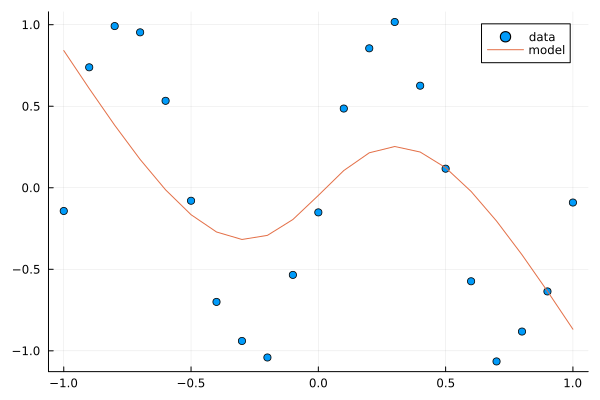

In [255]:
using Plots
yModel=zeros(Nx)
for nx=1:Nx
    yModel[nx]=modelNTK(xVec[nx:nx])[1]
end
scatter(xVec,yVec,label="data")
plot!(xVec,yModel,label="model")

In [244]:
test=Dense(3 => 1 , sigmoid,init=ones)

Dense(3 => 1, σ)    # 4 parameters

In [245]:
test.weight,test.bias

([1.0 1.0 1.0], [0.0])

In [246]:
xin=rand(3,3)
test(xin)

1×3 Matrix{Float64}:
 0.805722  0.935779  0.746723

In [247]:
testNTK=DenseNTK(3 => 1 , sigmoid,init=ones)

DenseNTK([1.0 1.0 1.0], [0.0], NNlib.σ)

In [248]:
testNTK.weight,testNTK.bias

([1.0 1.0 1.0], [0.0])

In [249]:
testNTK(xin)

1×3 Matrix{Float64}:
 0.694502  0.824444  0.651182

In [250]:
sigmoid.(testNTK.weight*xin[:,3]/sqrt(3) .+ testNTK.bias)

1-element Vector{Float64}:
 0.6511815504617818

In [251]:
A=rand(3,3)
B=rand(3,3)
c=rand(3,1)

3×1 Matrix{Float64}:
 0.6229222342869773
 0.27492226084966975
 0.5276412036536281

In [252]:
A*B

3×3 Matrix{Float64}:
 0.832343  0.664365  0.13403
 1.32849   1.13683   0.221163
 1.11499   1.14139   0.18569

In [253]:
A*B .+ c

3×3 Matrix{Float64}:
 1.45527  1.28729  0.756952
 1.60341  1.41176  0.496086
 1.64263  1.66903  0.713332